In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
flight_df = pd.read_excel('Train_set.xlsx')

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Converting the Date of journey column to Date time as it is an Object for now.
flight_df['Date'] = pd.to_datetime(flight_df['Date_of_Journey'], format='%d/%m/%Y')

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01


In [5]:
# Getting the day of the week as we know flight prices are usually higher on the weekend.
flight_df['Weekday'] = flight_df['Date'].dt.dayofweek

days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

flight_df['Weekday'] = flight_df['Weekday'].map(days)

flight_df['is_Weekend'] = flight_df['Weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
flight_df['is_Weekend'] = flight_df['is_Weekend'].astype(int)

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Weekday,is_Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,Sunday,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,Wednesday,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,Sunday,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,Sunday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,Friday,0


In [6]:
# Dropping the date of journey and weekday column as we don't want these columns now
flight_df.drop(['Date_of_Journey', 'Weekday'], axis=1, inplace=True)

In [7]:
# We have 1 missing value in the route column. Let's see and impute the missing.
print(flight_df.isnull().sum())

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
is_Weekend         0
dtype: int64


In [8]:
# As we only have 1 null value out of 10000+ records, we can drop it directly
flight_df.dropna(inplace=True)
flight_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
is_Weekend         0
dtype: int64

In [9]:
# We already have a column for Total Stops. So, we don't need the route column as wel
flight_df.drop('Route', axis=1, inplace=True)

In [10]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,1
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,1
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,1
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,0


In [11]:
# Let's clean Departure & Arrival Time column now
flight_df['Dep_Time'] = pd.to_datetime(flight_df['Dep_Time'])
flight_df['Arrival_Time'] = pd.to_datetime(flight_df['Arrival_Time'])

flight_df['Dep_hr'] = flight_df['Dep_Time'].dt.hour
flight_df['Dep_min'] = flight_df['Dep_Time'].dt.minute

flight_df['Arr_hr'] = flight_df['Arrival_Time'].dt.hour
flight_df['Arr_min'] = flight_df['Arrival_Time'].dt.minute

flight_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2022-02-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019-03-24,1,22,20,1,10
1,Air India,Kolkata,Banglore,2022-02-12 05:50:00,2022-02-12 13:15:00,7h 25m,2 stops,No info,7662,2019-05-01,0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2022-02-12 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019-06-09,1,9,25,4,25
3,IndiGo,Kolkata,Banglore,2022-02-12 18:05:00,2022-02-12 23:30:00,5h 25m,1 stop,No info,6218,2019-05-12,1,18,5,23,30
4,IndiGo,Banglore,New Delhi,2022-02-12 16:50:00,2022-02-12 21:35:00,4h 45m,1 stop,No info,13302,2019-03-01,0,16,50,21,35


In [12]:
flight_df.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)

In [13]:
# Let's clean Total Stop column now
flight_df['Total_Stops'] = flight_df['Total_Stops'].apply(lambda x: '0 stops' if x == 'non-stop' else x)
flight_df['Total_Stops'] = flight_df['Total_Stops'].str.split(" ").str[0]
flight_df['Total_Stops'] = flight_df['Total_Stops'].astype(int)

flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35


In [14]:
# Let's expand date column as well
flight_df['Day'] = flight_df['Date'].dt.day
flight_df['Month'] = flight_df['Date'].dt.month

flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35,1,3


In [15]:
# Let's also handle the Duration column now
flight_df['Duration_hr'] = flight_df['Duration'].str.split(" ").str[0]
flight_df['Duration_min'] = flight_df['Duration'].str.split(" ").str[1]

flight_df['Duration_hr'] = flight_df['Duration_hr'].replace(to_replace='h', value="")
flight_df['Duration_min'] = flight_df['Duration_min'].replace(to_replace='m', value="")

flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10,24,3,2h,50m
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15,1,5,7h,25m
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25,9,6,19h,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30,12,5,5h,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35,1,3,4h,45m


In [16]:
# Let's impute Nan values in the Dur_hr and Dur_min columns
flight_df['Duration_hr'].fillna('0h', inplace=True)
flight_df['Duration_min'].fillna('0m', inplace=True)

flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10,24,3,2h,50m
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15,1,5,7h,25m
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25,9,6,19h,0m
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30,12,5,5h,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35,1,3,4h,45m


In [17]:
# Now let's remove h and m values from hr and min columns
flight_df['Duration_hr'] = flight_df['Duration_hr'].apply(lambda x: x[:-1] if x[-1] == 'h' else x)
flight_df['Duration_min'] = flight_df['Duration_min'].apply(lambda x: x[:-1] if x[-1] == 'm' else x)

flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35,1,3,4,45


In [18]:
flight_df['Duration_hr'] = flight_df['Duration_hr'].astype(int)
flight_df['Duration_min'] = flight_df['Duration_min'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [19]:
# We have values in Duration_hr coulmn with value 'm' in it. Let's check these rows
flight_df[flight_df['Duration_hr'].apply(lambda x: x[-1]=='m')]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,2019-03-06,0,16,50,16,55,6,3,5m,0


In [20]:
# We only have 1 such record. The Price for this one is around 17k. 
# So, the duration seems to be 24 hours and not only 5 mins
# But, as this seems to be an outlier, we will delete this record

flight_df.drop(6474, axis=0, inplace=True)

In [21]:
# Let's again try to convert the column to int
flight_df['Duration_hr'] = flight_df['Duration_hr'].astype(int)
flight_df['Duration_min'] = flight_df['Duration_min'].astype(int)

In [22]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,2019-03-24,1,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,2019-05-01,0,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,2019-06-09,1,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,2019-05-12,1,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,2019-03-01,0,16,50,21,35,1,3,4,45


In [23]:
#Let's drop unwanted columns now
flight_df.drop(['Duration', 'Date'], axis=1, inplace=True)

flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,1,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,0,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,1,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,1,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,0,16,50,21,35,1,3,4,45


In [24]:
# Let's visualize and check if Additional_info column if of any use
flight_df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

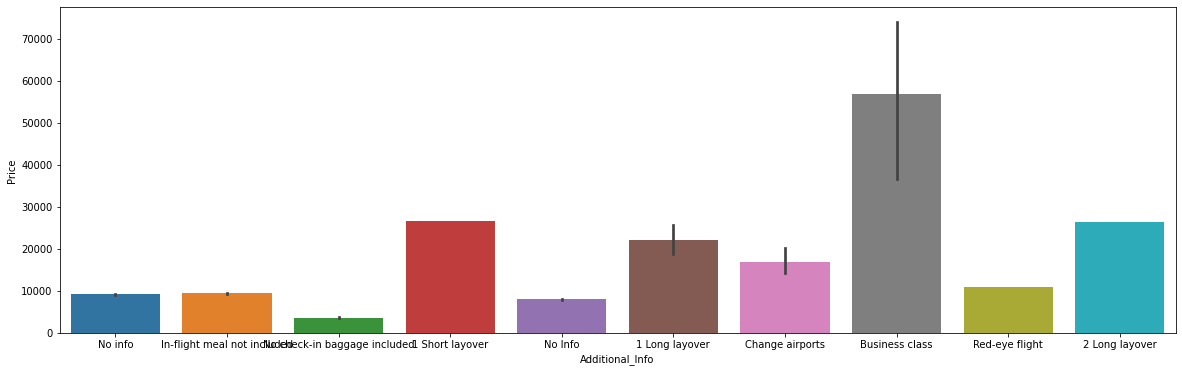

In [25]:
plt.figure(figsize=(20, 6))
sns.barplot(x=flight_df['Additional_Info'], y=flight_df['Price'])

In [26]:
pd.pivot_table(data=flight_df, values='Price', index='Additional_Info', aggfunc='mean')

,Price
Additional_Info,
1 Long layover,22109.631579
1 Short layover,26743.000000
2 Long layover,26480.000000
Business class,56811.250000
Change airports,16800.714286
In-flight meal not included,9471.834511
No Info,8044.666667
No check-in baggage included,3645.156250
No info,9140.538176


In [27]:
# We have different mean prices for different values in Additional_Info column
# hence, we will have to standardize values in this column and use it for prediction purpose

flight_df['Additional_Info'] = np.where(flight_df['Additional_Info']=='No info', 'No Info', flight_df['Additional_Info'])

pd.pivot_table(data=flight_df, values='Price', index='Additional_Info', aggfunc='mean')

,Price
Additional_Info,
1 Long layover,22109.631579
1 Short layover,26743.000000
2 Long layover,26480.000000
Business class,56811.250000
Change airports,16800.714286
In-flight meal not included,9471.834511
No Info,9140.144261
No check-in baggage included,3645.156250
Red-eye flight,10873.000000


In [28]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No Info,3897,1,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,2,No Info,7662,0,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,2,No Info,13882,1,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,1,No Info,6218,1,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,1,No Info,13302,0,16,50,21,35,1,3,4,45


In [29]:
# Let's also check the change in Price for different Airlines, Source and Destination

pd.pivot_table(data=flight_df, values='Price', index=['Source', 'Destination'], aggfunc='mean')

Price
Source   Destination              
Banglore Delhi         5143.918577
         New Delhi    11917.716738
Chennai  Kolkata       4789.892388
Delhi    Cochin       10540.113536
Kolkata  Banglore      9158.389411
Mumbai   Hyderabad     5042.083333

In [30]:
pd.pivot_table(data=flight_df, values='Price', index=['Airline'], aggfunc='mean')

,Price
Airline,
Air Asia,5590.260188
Air India,9608.019429
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


In [31]:
# We have two values for Delhi in destination column but only 1 in Source
# Also, we only have 1 Airport in Delhi. Hence, clubbing both the values

flight_df['Destination'] = np.where(flight_df['Destination']=='New Delhi', 'Delhi', flight_df['Destination'])

pd.pivot_table(data=flight_df, values='Price', index=['Source', 'Destination'], aggfunc='mean')

,,Price
Source,Destination,
Banglore,Delhi,8017.464269
Chennai,Kolkata,4789.892388
Delhi,Cochin,10540.113536
Kolkata,Banglore,9158.389411
Mumbai,Hyderabad,5042.083333


In [32]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Total_Stops      10681 non-null  int32 
 4   Additional_Info  10681 non-null  object
 5   Price            10681 non-null  int64 
 6   is_Weekend       10681 non-null  int32 
 7   Dep_hr           10681 non-null  int64 
 8   Dep_min          10681 non-null  int64 
 9   Arr_hr           10681 non-null  int64 
 10  Arr_min          10681 non-null  int64 
 11  Day              10681 non-null  int64 
 12  Month            10681 non-null  int64 
 13  Duration_hr      10681 non-null  int32 
 14  Duration_min     10681 non-null  int32 
dtypes: int32(4), int64(7), object(4)
memory usage: 1.4+ MB


In [33]:
flight_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
# We have a very few records for all the Premium and Business class airlines
# Hence, the model will not learn much from this and the model wouldn't generalize well
# So, we will club these with the parent name

flight_df['Airline'] = np.where(flight_df['Airline'] == 'Multiple carriers Premium economy', 'Multiple carriers', flight_df['Airline'])
flight_df['Airline'] = np.where(flight_df['Airline'] == 'Jet Airways Business', 'Jet Airways', flight_df['Airline'])
flight_df['Airline'] = np.where(flight_df['Airline'] == 'Vistara Premium economy', 'Vistara', flight_df['Airline'])

flight_df['Airline'].value_counts()


Jet Airways          3855
IndiGo               2053
Air India            1750
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

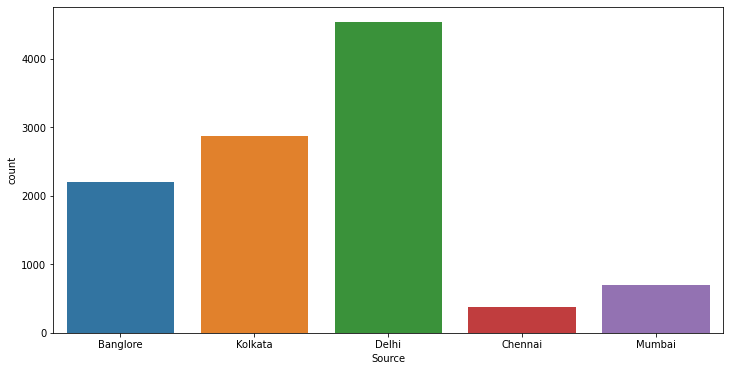

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(flight_df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

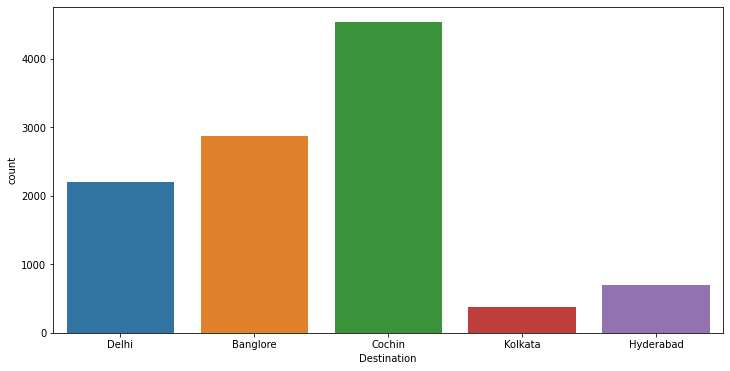

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(flight_df['Destination'])

In [43]:
flight_df.describe()

,Total_Stops,Price,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,0.824080,9086.443123,0.294354,12.490684,24.406891,13.348937,24.687763,13.509784,4.708735,10.245857,28.328808
std,0.675164,4611.075357,0.455773,5.748989,18.767046,6.859590,16.504975,8.479449,1.164345,8.494735,16.945106
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000
25%,0.000000,5277.000000,0.000000,8.000000,5.000000,8.000000,10.000000,6.000000,3.000000,2.000000,15.000000
50%,1.000000,8372.000000,0.000000,11.000000,25.000000,14.000000,25.000000,12.000000,5.000000,8.000000,30.000000
75%,1.000000,12373.000000,1.000000,18.000000,40.000000,19.000000,35.000000,21.000000,6.000000,15.000000,45.000000
max,4.000000,79512.000000,1.000000,23.000000,55.000000,23.000000,55.000000,27.000000,6.000000,47.000000,55.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

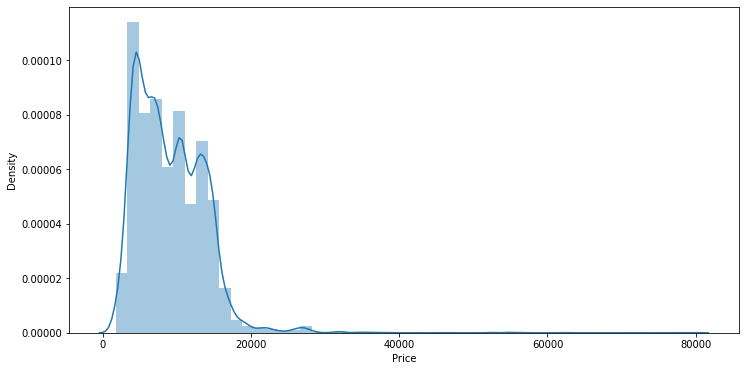

In [45]:
# Let's see how is Price column distributed

plt.figure(figsize=(12, 6))
sns.distplot(flight_df['Price'], kde=True)

In [49]:
# Let's see the average price on weekend and weekday

pd.pivot_table(flight_df, index='is_Weekend', values='Price', aggfunc='mean')

,Price
is_Weekend,
0,9025.732652
1,9231.982188


In [50]:
# There is not much difference in Flight Prices during weekdays and weekends
# If this feature is not of a value to us, we will drop this during feature selection process

pd.pivot_table(flight_df, index='Total_Stops', values='Price', aggfunc='mean')

,Price
Total_Stops,
0,5024.900315
1,10594.123556
2,12712.772219
3,13112.000000
4,17686.000000


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

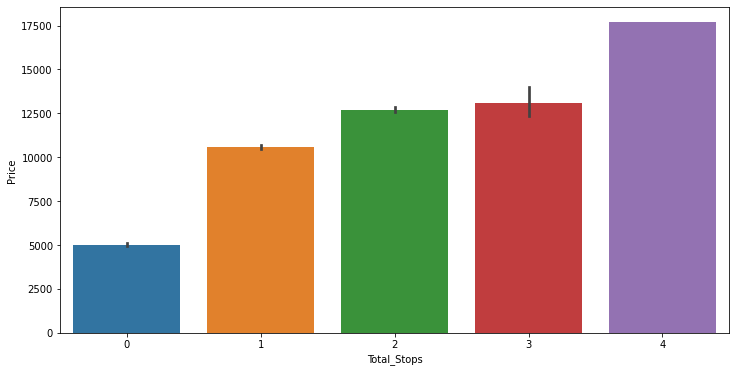

In [51]:
# Total stops column has a proportional relationship with the Price column

plt.figure(figsize=(12, 6))
sns.barplot(x=flight_df['Total_Stops'], y=flight_df['Price'])

<AxesSubplot:xlabel='Duration_hr', ylabel='Price'>

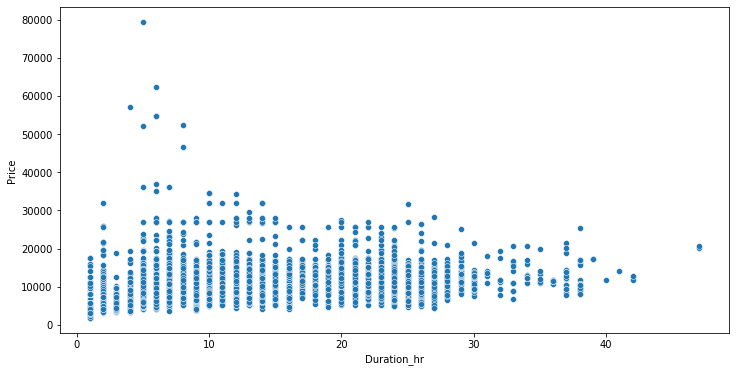

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=flight_df['Duration_hr'], y=flight_df['Price'])

<AxesSubplot:xlabel='Dep_hr', ylabel='Price'>

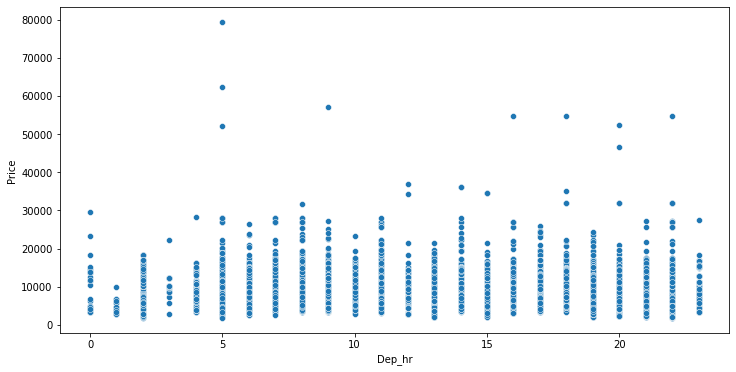

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=flight_df['Dep_hr'], y=flight_df['Price'])

<AxesSubplot:xlabel='Source', ylabel='Price'>

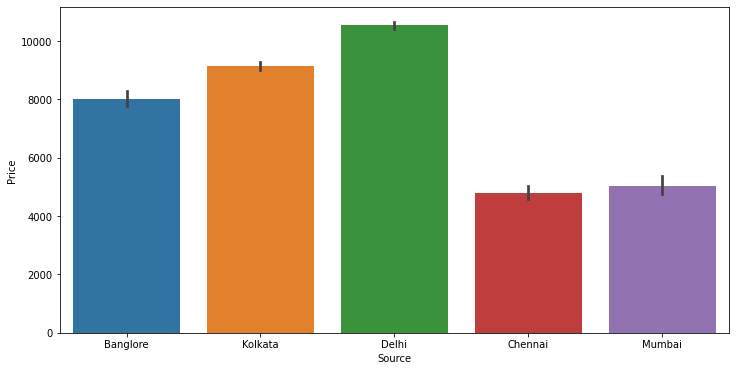

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_df['Source'], y=flight_df['Price'])

<AxesSubplot:xlabel='Destination', ylabel='Price'>

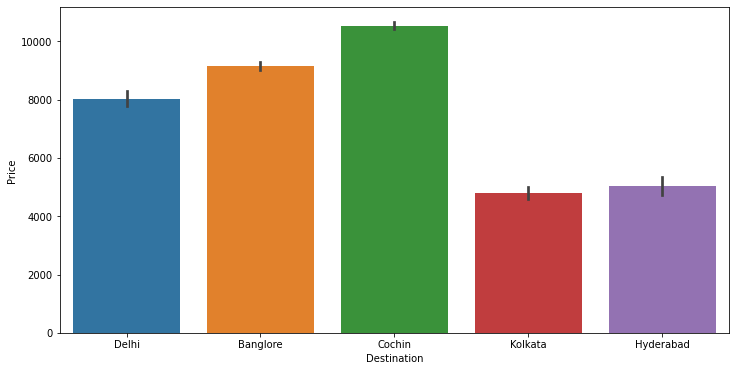

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_df['Destination'], y=flight_df['Price'])

<AxesSubplot:xlabel='Airline', ylabel='Price'>

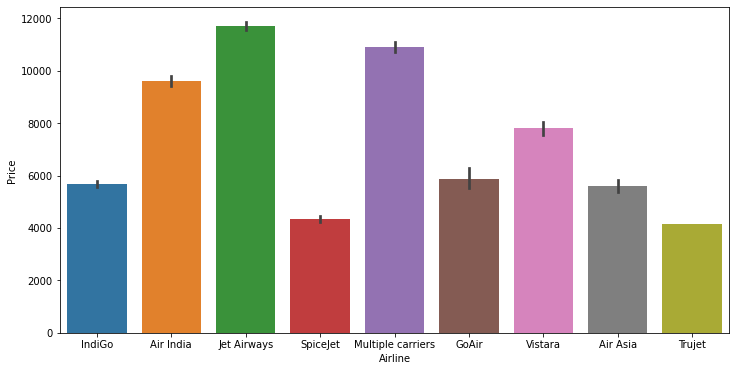

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_df['Airline'], y=flight_df['Price'])

In [69]:
flight_df_airlines = pd.get_dummies(flight_df[['Airline']], drop_first=True, prefix=None)
flight_df_source = pd.get_dummies(flight_df[['Source']], drop_first=True, prefix='s')
flight_df_dest = pd.get_dummies(flight_df[['Destination']], drop_first=True, prefix='d')
flight_df_add_info = pd.get_dummies(flight_df[['Additional_Info']], drop_first=True, prefix=None)

In [70]:
flight_df_airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [71]:
flight_df_add_info.head()

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [72]:
flight_df_source.head()

,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [73]:
flight_df_dest.head()

,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [76]:
flight_df_encoded = pd.concat([flight_df, flight_df_airlines, flight_df_source, flight_df_dest, flight_df_add_info], axis=1)

In [77]:
flight_df_encoded.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,IndiGo,Banglore,Delhi,0,No Info,3897,1,22,20,1,10,24,3,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,No Info,7662,0,5,50,13,15,1,5,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,2,No Info,13882,1,9,25,4,25,9,6,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,No Info,6218,1,18,5,23,30,12,5,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,IndiGo,Banglore,Delhi,1,No Info,13302,0,16,50,21,35,1,3,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [78]:
flight_df_encoded.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)

flight_df_encoded.head()

,Total_Stops,Price,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,1,22,20,1,10,24,3,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2,7662,0,5,50,13,15,1,5,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,13882,1,9,25,4,25,9,6,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,6218,1,18,5,23,30,12,5,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,13302,0,16,50,21,35,1,3,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [83]:
# Splitting the indep features & target column

X = flight_df_encoded.drop('Price', axis=1)
y = flight_df_encoded[['Price']]

In [84]:
X.head(), y.head()

(   Total_Stops  is_Weekend  Dep_hr  Dep_min  Arr_hr  Arr_min  Day  Month  \
 0            0           1      22       20       1       10   24      3   
 1            2           0       5       50      13       15    1      5   
 2            2           1       9       25       4       25    9      6   
 3            1           1      18        5      23       30   12      5   
 4            1           0      16       50      21       35    1      3   
 
    Duration_hr  Duration_min  Airline_Air India  Airline_GoAir  \
 0            2            50                  0              0   
 1            7            25                  1              0   
 2           19             0                  0              0   
 3            5            25                  0              0   
 4            4            45                  0              0   
 
    Airline_IndiGo  Airline_Jet Airways  Airline_Multiple carriers  \
 0               1                    0                       

In [91]:
# Creating train test split

!pip install sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'C:\Users\Saifur Shaikh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8544, 34)
(2137, 34)
(8544, 1)
(2137, 1)


In [94]:
# Our dataset is more like of a root node and child node splits
# Example : If airline is Jet Ariways, source is x and dest is y then the price is different and accordingly
# Hence, we will be using Random Forest model here

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100)

In [96]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([ 8040.        ,  4714.1       ,  7388.11      , ...,
        5593.5       , 10876.15      , 12225.53166667])

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

print('Train Accuracy:', rf_model.score(X_train, y_train))
print('Train Accuracy:', rf_model.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-Squared:', r2_score(y_test, y_pred))

Train Accuracy: 0.9801034934485
Train Accuracy: 0.8605717089630615
RMSE: 1781.2741203315734
R-Squared: 0.8605717089630615


In [99]:
#selection_importances_

print(rf_model.feature_importances_)

[3.06118350e-02 7.94468764e-03 2.26316526e-02 2.08735459e-02
 2.67779763e-02 2.10959560e-02 9.40957896e-02 5.20757481e-02
 4.36508634e-01 1.81378714e-02 6.83101501e-03 8.08180217e-04
 7.10817958e-03 6.75504365e-02 1.98690575e-02 3.88793608e-03
 0.00000000e+00 3.73584247e-03 4.41047477e-04 3.73245451e-03
 6.04067959e-03 3.19144283e-03 3.73464295e-03 2.15583369e-02
 3.65825672e-03 4.87805423e-04 0.00000000e+00 8.93600170e-04
 2.76764036e-02 4.69405936e-04 8.20607664e-02 5.49059126e-03
 1.84981989e-05 1.72385669e-06]


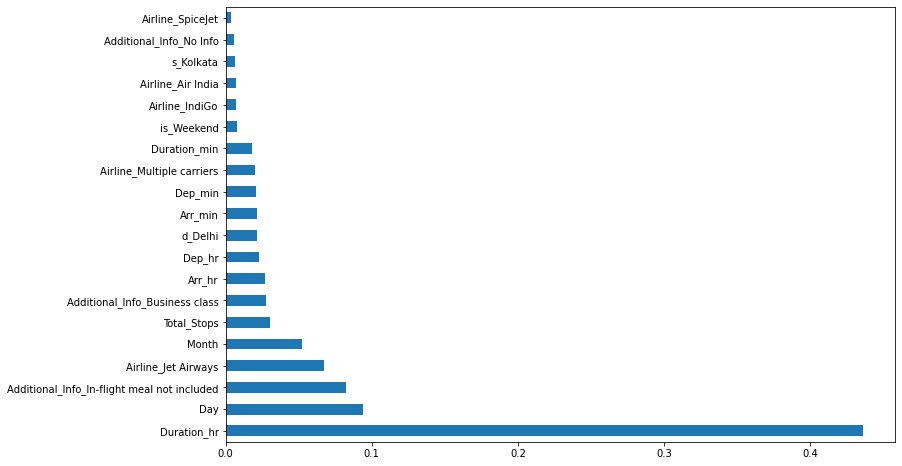

In [100]:
#plot graph of 'feature_importances_' for better visualization

plt.figure(figsize = (12,8))
fig_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

In [102]:
# Using SelectFromModel to select important features from RandomForest Model
 
from sklearn.feature_selection import SelectFromModel

sel =  SelectFromModel(RandomForestRegressor(n_estimators=100))

sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [104]:
sel.get_support()

array([ True, False, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [105]:
selected_feat = X.columns[(sel.get_support())]
len(selected_feat)

6

In [106]:
print(selected_feat)

Index(['Total_Stops', 'Day', 'Month', 'Duration_hr', 'Airline_Jet Airways',
       'Additional_Info_In-flight meal not included'],
      dtype='object')


In [107]:
# Hyper parameter tuning using Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [108]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [109]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [110]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [111]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [114]:
pred = rf_random.predict(X_test)
pred

array([ 7987.353     ,  4684.06373333,  7472.091     , ...,
        5573.215     , 10995.3036    , 12013.15128095])

In [127]:
print('Train Accuracy:', rf_random.score(X_train, y_train))
print('Test Accuracy:', rf_random.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

print('R-Squared:', r2_score(y_test, pred))

Train Accuracy: -380760.6879426448
Test Accuracy: -3082346.374221756
RMSE: 1755.6612356094658
R-Squared: 0.8645525515528367


In [119]:
score_df = pd.DataFrame([y_pred, pred], index=['Y_Pred', 'Pred'])

In [120]:
score_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [122]:
score_df_T = score_df.T
score_df_T.head(10)

,Y_Pred,Pred
0,8040.00,7987.353000
1,4714.10,4684.063733
2,7388.11,7472.091000
3,8965.08,8738.342333
4,14644.81,14655.853000
5,10437.56,10516.037000
6,8761.31,8785.500000
7,8004.39,7967.910000
8,4501.64,4718.153000
9,10475.19,10450.816000


In [132]:
train_pred = rf_random.predict(X_train)

print('RMSE_train:', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE_test:', np.sqrt(mean_squared_error(y_test, pred)))

print('R-Squared_train:', r2_score(y_train, train_pred))
print('R-Squared_test:', r2_score(y_test, pred))

RMSE_train: 617.0580912220865
RMSE_test: 1755.6612356094658
R-Squared_train: 0.9817673060958698
R-Squared_test: 0.8645525515528367


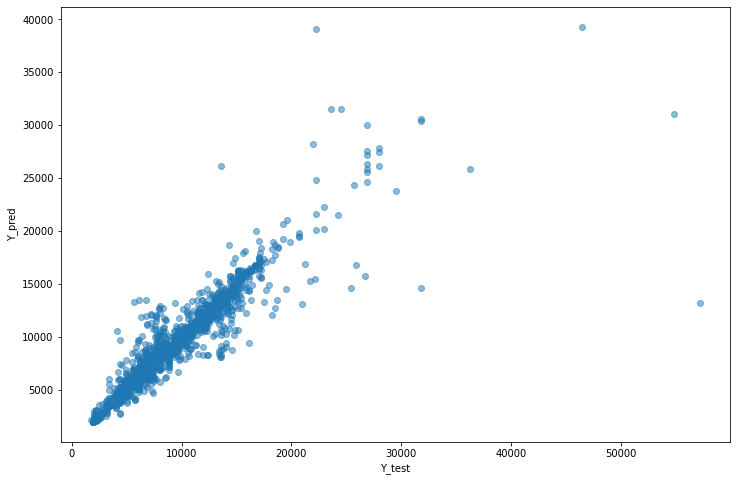

In [135]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [133]:
# Saving the model for future use

import pickle

# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [134]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

Y_prediction = forest.predict(X_test)

print(r2_score(y_test, Y_prediction))
#Conclusion:--> r2-value is increased

0.8645525515528367


In [138]:
pd.set_option('display.max_columns', None)
X_train.head()

,Total_Stops,is_Weekend,Dep_hr,Dep_min,Arr_hr,Arr_min,Day,Month,Duration_hr,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,s_Chennai,s_Delhi,s_Kolkata,s_Mumbai,d_Cochin,d_Delhi,d_Hyderabad,d_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
9958,1,1,11,25,19,15,1,6,7,50,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7083,0,0,10,20,11,50,15,5,1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
713,1,1,19,45,16,20,24,3,20,35,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
885,0,0,13,20,16,10,15,5,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8387,0,0,4,0,6,50,1,4,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [149]:
day = 'Sunday'

In [158]:
form_map = {'Sunday':1}
num = int(day.replace('Sunday', '1'))

int